In [ ]:
!curl -L -o ./gtsrb-german-traffic-sign.zip\
  https://www.kaggle.com/api/v1/datasets/download/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  611M  100  611M    0     0  91.2M      0  0:00:06  0:00:06 --:--:-- 91.2M


In [ ]:
import gdown
!unzip gtsrb-german-traffic-sign.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_csv = pd.read_csv('Test.csv')
train_csv = pd.read_csv('Train.csv')
meta_csv = pd.read_csv('Meta.csv')
meta_csv.head(5)

In [ ]:
test_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Préparer les données
def preprocess_data(data, base_path):
    images = []
    labels = []
    for _, row in data.iterrows():
        img_path = os.path.join(base_path, row['Path'])
        img = cv2.imread(img_path)
        img = cv2.resize(img, (68, 68))  # Redimensionnement à 32x32
        images.append(img)
        labels.append(row['ClassId'])
    return np.array(images), np.array(labels)

train_images, train_labels = preprocess_data(train_csv, '')
test_images, test_labels = preprocess_data(test_csv, '')

# Normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

# Encoder les labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels)

# Diviser en validation
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Construire le modèle CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(68, 68, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(lb.classes_), activation='softmax')  # Nombre de classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# Entraîner le modèle
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=15,
    batch_size=32
)

# Évaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 66, 66, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 33, 33, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,843,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,868,267 (7.13 MB)

 Trainable params: 1,868,267 (7.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 276s 278ms/step - accuracy: 0.6252 - loss: 1.4272 - val_accuracy: 0.9601 - val_loss: 0.1528
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 266s 271ms/step - accuracy: 0.9663 - loss: 0.1249 - val_accuracy: 0.9637 - val_loss: 0.1400
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 321s 270ms/step - accuracy: 0.9836 - loss: 0.0630 - val_accuracy: 0.9668 - val_loss: 0.1279
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 317s 265ms/step - accuracy: 0.9869 - loss: 0.0492 - val_accuracy: 0.9836 - val_loss: 0.0660
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 272s 275ms/step - accuracy: 0.9930 - loss: 0.0278 - val_accuracy: 0.9897 - val_loss: 0.0481
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 316s 270ms/step - accuracy: 0.9910 - loss: 0.0325 - val_accuracy: 0.9824 - val_loss: 0.0730
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 331s 279ms/step - accuracy: 0.9961 - loss: 0.0133 - val_accuracy: 0.9727 - val_loss: 0.1074
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 266s 271ms/step - accuracy: 0.9936 -

In [ ]:
[(_, row) for _, row in train_csv.iterrows()]


[(0,
  Width                                  27
  Height                                 26
  Roi.X1                                  5
  Roi.Y1                                  5
  Roi.X2                                 22
  Roi.Y2                                 20
  ClassId                                20
  Path       Train/20/00020_00000_00000.png
  Name: 0, dtype: object),
 (1,
  Width                                  28
  Height                                 27
  Roi.X1                                  5
  Roi.Y1                                  6
  Roi.X2                                 23
  Roi.Y2                                 22
  ClassId                                20
  Path       Train/20/00020_00000_00001.png
  Name: 1, dtype: object),
 (2,
  Width                                  29
  Height                                 26
  Roi.X1                                  6
  Roi.Y1                                  5
  Roi.X2                                 24
  Roi.Y

In [ ]:
train_images, train_labels = preprocess_data(train_csv, '')
test_images, test_labels = preprocess_data(test_csv, '')
# print(train_images)
# print(train_labels.shape)
# print(test_images.shape)
# print(test_labels.shape)
train_labels

array([20, 20, 20, ..., 42, 42, 42])

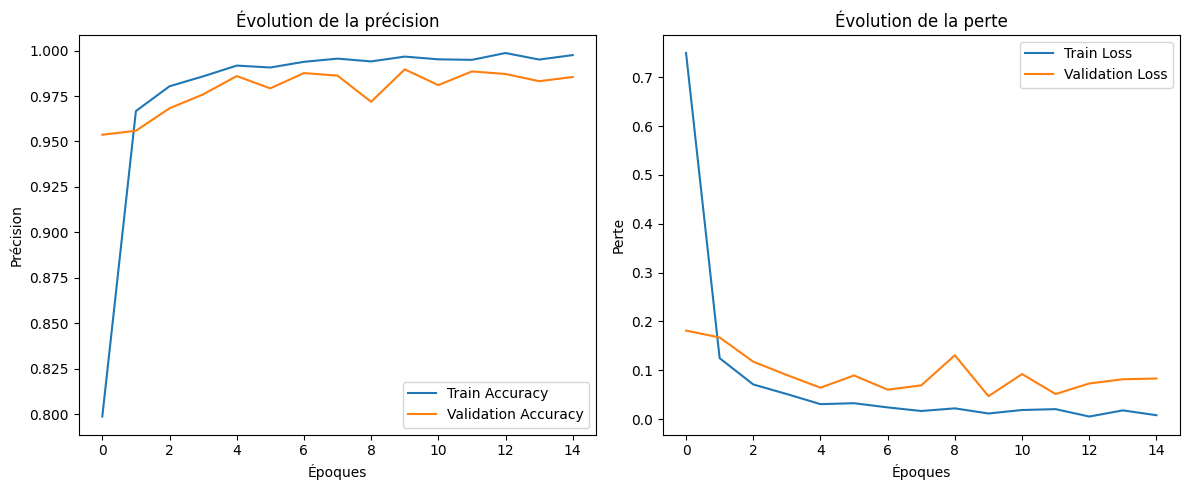

In [ ]:
# Tracer la précision et la perte
def plot_training_results(history):
    # Précision
    plt.figure(figsize=(12, 5))

    # Précision
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Évolution de la précision')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()

    # Perte
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Évolution de la perte')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Appeler la fonction pour tracer
plot_training_results(history)

In [ ]:
import numpy as np

# Prédire sur l'ensemble de test
predictions = model.predict(test_images)

# Convertir les probabilités en indices de classe
predicted_classes = np.argmax(predictions, axis=1)

# Vérifier la précision sur les données de test
# test_labels_true = np.argmax(test_labels, axis=1)  # Convertir one-hot en indices
if test_labels.ndim > 1 and test_labels.shape[1] > 1:
    test_labels_true = np.argmax(test_labels, axis=1)
else:
    test_labels_true = test_labels  # Si déjà sous forme d'indices

accuracy = np.mean(predicted_classes == test_labels_true)
print(f"Précision sur l'ensemble de test : {accuracy * 100:.2f}%")


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Précision sur l'ensemble de test : 87.33%


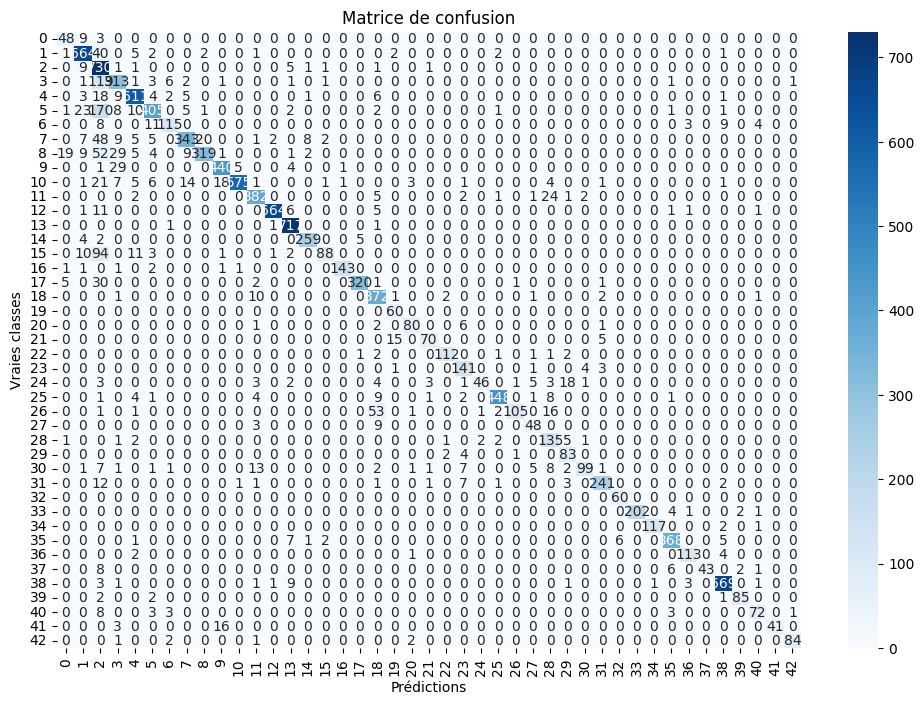

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
cm = confusion_matrix(test_labels_true, predicted_classes)

# Afficher sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de confusion")
plt.show()


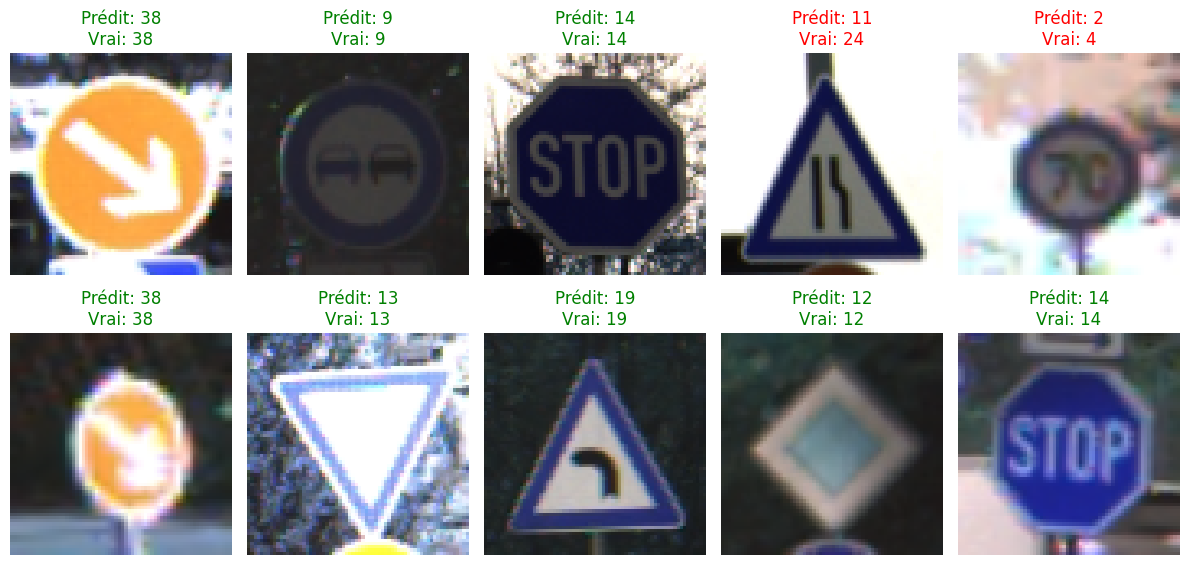

In [ ]:
import matplotlib.pyplot as plt

# Sélectionner aléatoirement 10 images
num_images = 10
indices = np.random.choice(len(test_images), num_images, replace=False)

plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx])
    plt.axis('off')

    true_label = test_labels_true[idx]
    predicted_label = predicted_classes[idx]

    # Couleur verte si correct, rouge sinon
    color = "green" if true_label == predicted_label else "red"
    plt.title(f"Prédit: {predicted_label}\nVrai: {true_label}", color=color)

plt.tight_layout()
plt.show()


In [ ]:
import cv2

def predict_real_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (68, 68))  # Redimensionner à la taille d'entrée du modèle
    img = img / 255.0  # Normalisation
    img = np.expand_dims(img, axis=0)  # Ajouter une dimension batch

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Afficher l'image et la prédiction
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Prédiction: {predicted_class}", color="blue")
    plt.show()

    return predicted_class

# Exemple d'utilisation :
predict_real_image("/content/20jpeg.jpeg")  # Remplace par le chemin réel


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, img_size=(68, 68)):
    """Charge une image, la redimensionne et la normalise."""
    img = image.load_img(img_path, target_size=img_size)  # Redimensionnement
    img_array = image.img_to_array(img)  # Conversion en array NumPy
    img_array = img_array / 255.0  # Normalisation (comme à l'entraînement)
    img_array = np.expand_dims(img_array, axis=0)  # Ajout d'une dimension batch
    return img_array

# Charger une image et la prédire
img_path = "chemin_vers_image_test.jpg"  # Remplace par ton image
img_array = preprocess_image(img_path)

# Prédire la classe
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

print(f"Panneau prédit : {predicted_label}")


Nombre d'erreurs : 1600


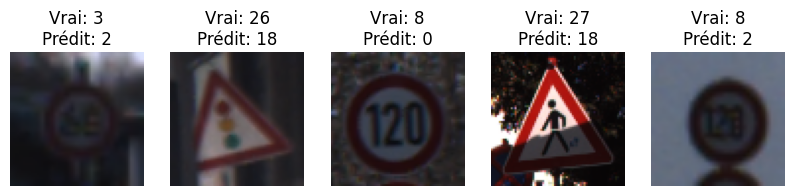

In [ ]:
import random
import cv2

# Trouver les indices des erreurs
errors = np.where(predicted_classes != test_labels_true)[0]
print(f"Nombre d'erreurs : {len(errors)}")

# Sélectionner 5 erreurs au hasard
random_errors = np.random.choice(errors, size=5, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_errors):
    img = test_images[idx]  # Image originale
    true_label = test_labels_true[idx]
    predicted_label = predicted_classes[idx]

    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Afficher en couleurs normales
    plt.axis("off")
    plt.title(f"Vrai: {true_label}\nPrédit: {predicted_label}")

plt.show()


In [ ]:
# prompt: Faire les prédictions sur les données de test et quelques données réelles que tu aura a genere

# Générer quelques données d'exemple (remplacez par vos propres données)
import random
example_images = []
example_labels = []
for i in range(5):  # Générer 5 exemples
    random_index = random.randint(0, len(test_images) - 1)
    example_images.append(test_images[random_index])
    example_labels.append(test_labels[random_index])

example_images = np.array(example_images)
example_labels = np.array(example_labels)


# Faire des prédictions sur les données de test
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_labels
# true_labels = np.argmax(test_labels, axis=1)


# Afficher les prédictions et les vraies étiquettes pour les données d'exemple
print("Prédictions sur des données d'exemple :")
for i in range(len(example_images)):
  predicted_class = np.argmax(model.predict(np.expand_dims(example_images[i], axis=0)))
  print(f"Exemple {i+1}: Prédiction = {predicted_class},  Vraie étiquette = {np.argmax(example_labels[i])}")

# Évaluer les performances du modèle sur les données de test
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(true_labels, predicted_labels))
print(confusion_matrix(true_labels, predicted_labels))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prédictions sur des données d'exemple :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
Exemple 1: Prédiction = 18,  Vraie étiquette = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Exemple 2: Prédiction = 33,  Vraie étiquette = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Exemple 3: Prédiction = 7,  Vraie étiquette = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Exemple 4: Prédiction = 1,  Vraie étiquette = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Exemple 5: Prédiction = 20,  Vraie étiquette = 0
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        60
           1       0.89      0.92      0.91       720
           2       0.52      0.97      0.68       750
           3       0.76      0.70      0.72       450
           4       0.92      0.93      0.92       660
           5       0.90      0.64      0.75       630
           6       0.88      0.77      0.82       150
           7       0.91      0.76      0.83       45

In [ ]:

# Save the model
model.save('traffic_sign_model.h5')

# Download the model file
from google.colab import files
files.download('traffic_sign_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
# Charger et Préparer les Données
IMG_SIZE = (68, 68)  # Nouvelle résolution
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation des pixels
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    zoom_range=0.2,
    validation_split=0.2  # Séparer train / validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/Train',  # Replace with the correct path to your training images directory
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
   '/content/Train',  # Replace with the correct path to your training images directory
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [ ]:
#  Charger MobileNetV2 et Modifier
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(68, 68, 3))
base_model.trainable = False  # On gèle les couches pré-entraînées

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)  # Couche dense supplémentaire
x = Dense(64, activation="relu")(x)
predictions = Dense(43, activation="softmax")(x)  # 43 classes pour GTSRB

model = Model(inputs=base_model.input, outputs=predictions)


<ipython-input-22-8e7bf83d26b6>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(68, 68, 3))


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 130s 122ms/step - accuracy: 0.3678 - loss: 2.2211 - val_accuracy: 0.4428 - val_loss: 1.8198
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 93s 95ms/step - accuracy: 0.5862 - loss: 1.2687 - val_accuracy: 0.4431 - val_loss: 1.8711
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 89s 91ms/step - accuracy: 0.6306 - loss: 1.0849 - val_accuracy: 0.4696 - val_loss: 1.8119
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 90s 91ms/step - accuracy: 0.6730 - loss: 0.9776 - val_accuracy: 0.4826 - val_loss: 1.8511
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 92s 93ms/step - accuracy: 0.6969 - loss: 0.9084 - val_accuracy: 0.4752 - val_loss: 1.9226
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 95s 96ms/step - accuracy: 0.7043 - loss: 0.8735 - val_accuracy: 0.4771 - val_loss: 1.9870
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 90s 92ms/step - accuracy: 0.7152 - loss: 0.8344 - val_accuracy: 0.4897 - val_loss: 1.8858
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 91s 93ms/step - accuracy: 0.7306 - loss: 0.8015 

In [ ]:
# Charger les données de test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "chemin_vers_test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Prédictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Vraies classes
true_classes = test_generator.classes

# Matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies Classes")
plt.title("Matrice de Confusion")
plt.show()

# Rapport de classification
print(classification_report(true_classes, predicted_classes))


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "chemin_vers_image_test.jpg"  # Remplace par une image réelle
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

print(f"Panneau prédit : {predicted_label}")
